In [1]:
#make modules reload automatically
%load_ext autoreload
%autoreload 2

In [2]:
from snake_env import SnakeEnv
from apple import Apple
from snake import Snake

pygame 2.4.0 (SDL 2.26.4, Python 3.10.11)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
import pygame
import random
import numpy as np
import ray
from ray.tune.registry import register_env
from ray.tune.logger import pretty_print

In [4]:
ray.init(ignore_reinit_error=True)
print("Ray initialized")

2023-05-20 21:12:01,518	INFO worker.py:1625 -- Started a local Ray instance.


Ray initialized


In [5]:
def env_creator(env_config):
    return SnakeEnv(env_config)

In [10]:
snakie = SnakeEnv({"render_mode" : "human"})
snakie.reset()

(array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 {})

In [12]:
#run forever and take actions from keyboard and collect data about the reward
done = False
action = 0
while not done:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            pygame.quit()
        if event.type == pygame.KEYDOWN:
            if event.key == pygame.K_LEFT:
                action = np.array([0,0,1,0])
            elif event.key == pygame.K_RIGHT:
                action =  np.array([0,0,0,1])
            elif event.key == pygame.K_UP:
                action = np.array([1,0,0,0])
            elif event.key == pygame.K_DOWN:
                action = np.array([0,1,0,0])
    obs,reward,done,_,_ = snakie.step(action)
    print(reward)
    snakie.render("human")
    pygame.time.wait(200)

pygame.quit()

error: video system not initialized

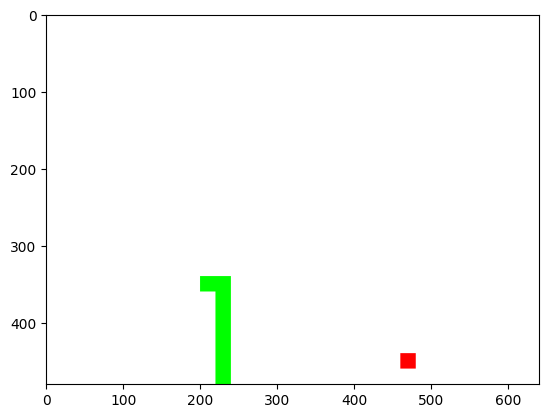

In [16]:
import mediapy as media
#make some random colored image 
img = np.random.randint(0,255,(100,100,3),dtype=np.uint8)
img = snakie.render()
#show the image
import matplotlib.pyplot as plt
plt.imshow(img)

up


""

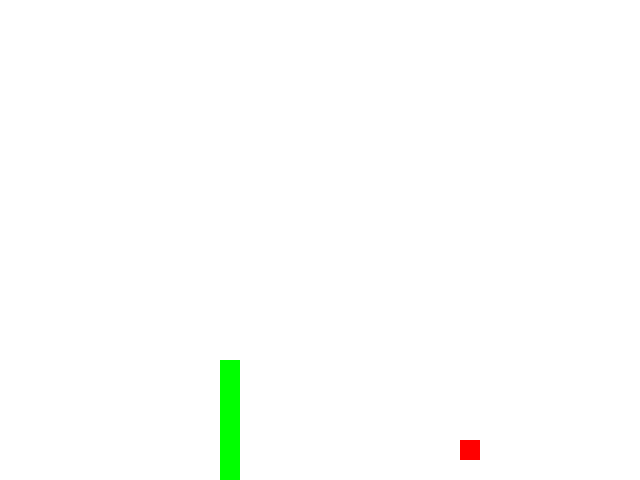

In [18]:

snakie.step("up")
media.show_image(snakie.render())

In [25]:
img

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [26]:
img[img ==255] = 0

In [27]:
register_env("snake-v0", env_creator)

ead the yaml as dictionary 

In [28]:
import yaml
with open("SnakeConfig.yaml", 'r') as stream:
    try:
        config = yaml.safe_load(stream)
        if config is None:
            raise Exception("Invalid YAML file")
    except yaml.YAMLError as exc:
        print(exc)

In [29]:
print("Config loaded")

Config loaded


In [30]:
trainer = PPOTrainer(config=config, env="snake-v0")

2023-04-16 00:08:30,861	WARNING deprecation.py:50 -- DeprecationWarning: `algo = Algorithm(env='snake-v0', ...)` has been deprecated. Use `algo = AlgorithmConfig().environment('snake-v0').build()` instead. This will raise an error in the future!


KeyboardInterrupt: 

(autoscaler +1m10s) Tip: use `ray status` to view detailed cluster status. To disable these messages, set RAY_SCHEDULER_EVENTS=0.
(autoscaler +1m10s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


env = SnakeEnv({"screen_width":400,"screen_height":400, "block_size":20})<br>
env.reset()<br>
dir = 'right'<br>
while env.done == False :

    #if keyboard is pressed:<br>
    env.step(dir)<br>
    env.render()<br>
    for event in pygame.event.get():<br>
        #check for keypress<br>
        if event.type == pygame.KEYDOWN:<br>
            if event.key == pygame.K_UP:<br>
                dir = 'up'<br>
            elif event.key == pygame.K_DOWN:<br>
                dir = 'down'<br>
            elif event.key == pygame.K_LEFT:<br>
                dir = 'left'<br>
            elif event.key == pygame.K_RIGHT:<br>
                dir = 'right'<br>
        if event.type == pygame.QUIT:<br>
            pygame.quit()<br>
            quit()